# PART 1

__DOMAIN__: Digital content management

__CONTEXT__: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classi ication problem.

__DATA DESCRIPTION__: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected
posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger `id#` and the blogger’s self-provided `gender`, `age`, `industry`, and `astrological sign`. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:

• 8240 "10s" blogs (ages 13-17),

• 8086 "20s" blogs(ages 23-27) and

• 2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link. Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus

__PROJECT OBJECTIVE__: The need is to build a NLP classifier which can use input text parameters to determine the label/s of the blog.

### Steps and tasks:

#### 1. Read and Analyse Dataset. [5 Marks]

__A. Clearly write outcome of data analysis(Minimum 2 points) [2 Marks]__

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.multiclass import OneVsRestClassifier
import gc
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from langdetect import detect
from joblib import dump, load
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, f1_score
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [4]:
dataset = pd.read_csv("blogtext.csv")

In [5]:
dataset.head(20)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [7]:
dataset.describe(include = "all")

,id,gender,age,topic,sign,date,text
count,6.812840e+05,681284,681284.000000,681284,681284,681284,681284
unique,NaN,2,NaN,40,12,2616,611652
top,NaN,male,NaN,indUnk,Cancer,"02,August,2004",urlLink
freq,NaN,345193,NaN,251015,65048,16544,445
mean,2.397802e+06,NaN,23.932326,NaN,NaN,NaN,NaN
std,1.247723e+06,NaN,7.786009,NaN,NaN,NaN,NaN
min,5.114000e+03,NaN,13.000000,NaN,NaN,NaN,NaN
25%,1.239610e+06,NaN,17.000000,NaN,NaN,NaN,NaN
50%,2.607577e+06,NaN,24.000000,NaN,NaN,NaN,NaN
75%,3.525660e+06,NaN,26.000000,NaN,NaN,NaN,NaN


In [8]:
maximum = 0 
minimum = 100000
for text in dataset["text"]:
    curr = len(text)
    #print(curr)
    if curr > maximum:
        maximum = curr 
    if curr < minimum:
        minimum = curr
    
print(maximum)
print(minimum)

790123
4


# Trimming the dataset for quick feedback : remove this code please!!!!!!

In [9]:
dataset = dataset[ : 2000].copy()

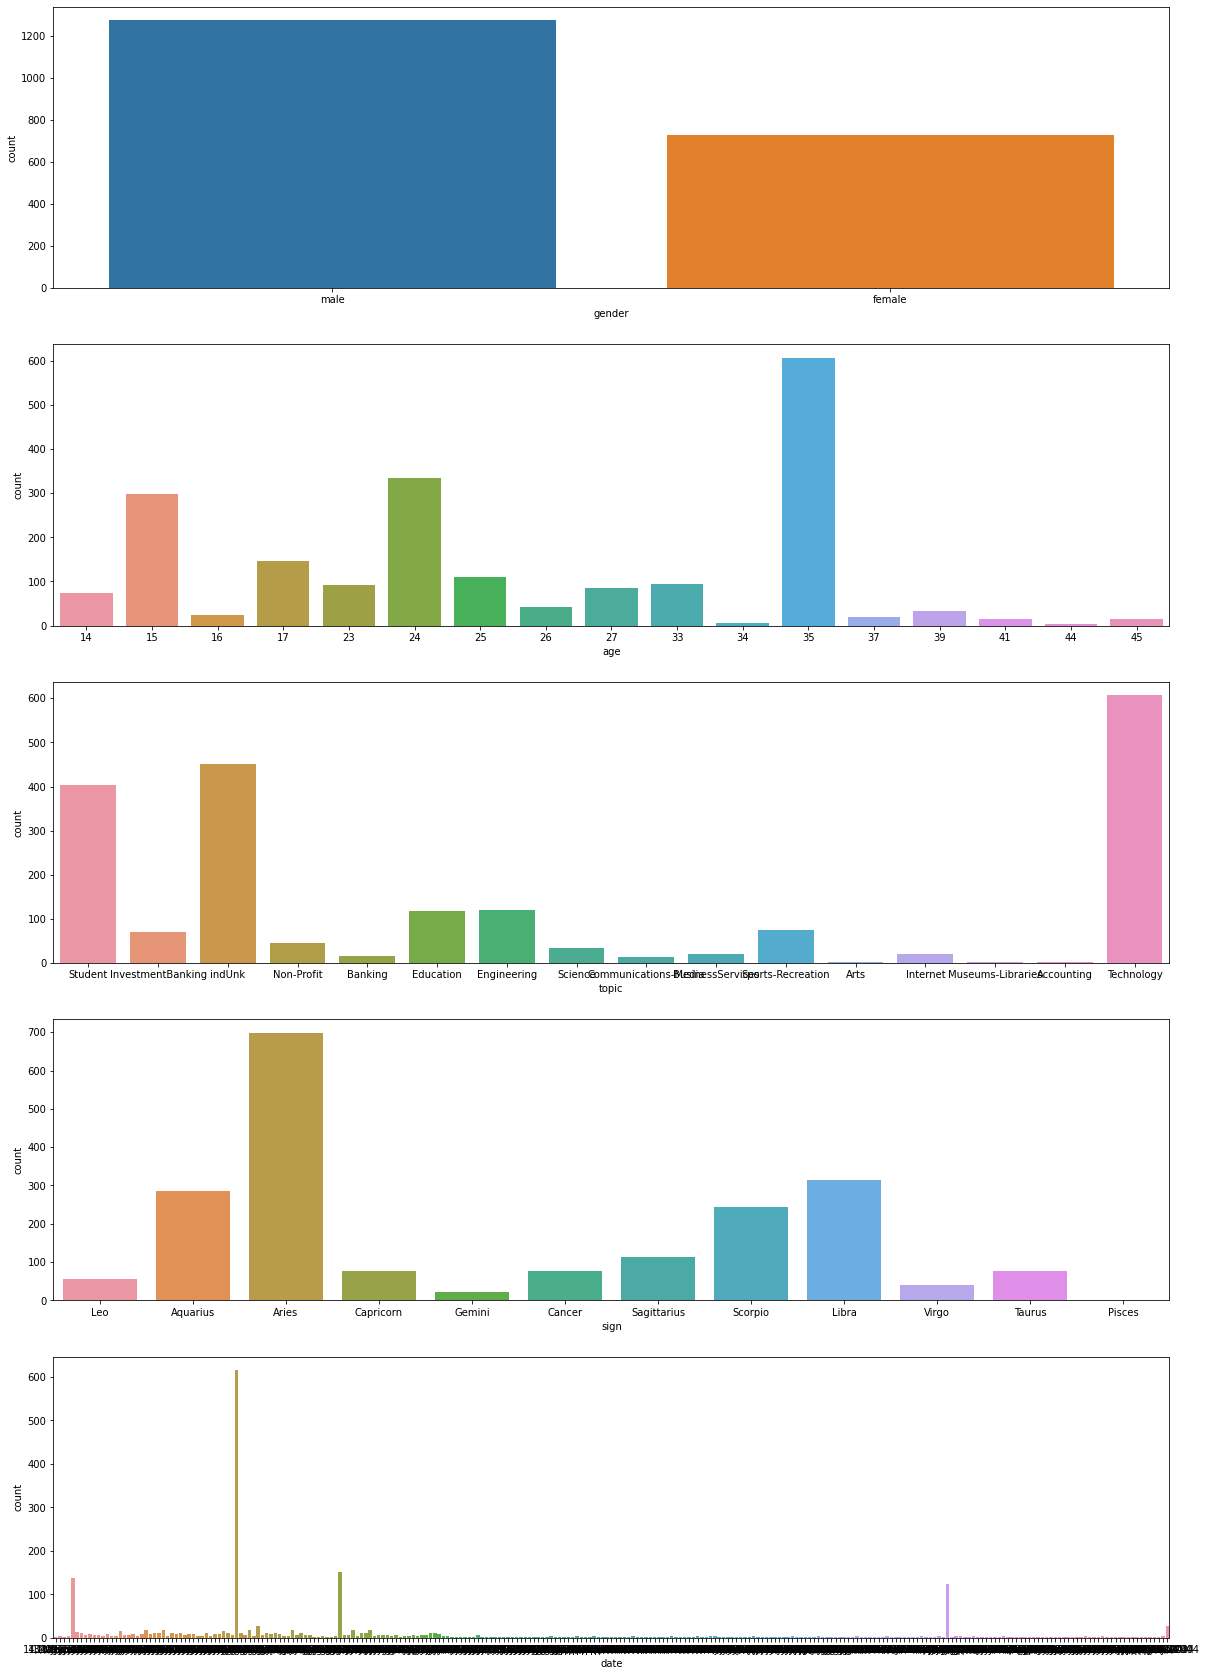

In [10]:
fig, axes = plt.subplots(5, 1, figsize = (20, 30))
for i, col in enumerate(["gender", "age", "topic", "sign", "date"]):
    sns.countplot(data = dataset, x = col, ax = axes[i])

<AxesSubplot:ylabel='Count'>

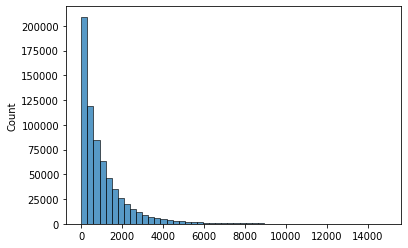

In [11]:
dataset = pd.read_csv("blogtext.csv")
lens = dataset["text"].apply(lambda x : len(x))
sns.histplot(sorted(lens)[ : -1000], bins = 50)

In [12]:
dataset.groupby("topic").nunique()

,id,gender,age,sign,date,text
topic,,,,,,
Accounting,105,2,20,12,605,3693
Advertising,145,2,21,12,643,4653
Agriculture,36,2,14,12,423,1231
Architecture,69,2,17,12,301,1604
Arts,721,2,26,12,1198,30918
Automotive,54,2,17,12,240,1242
Banking,112,2,17,12,530,3999
Biotech,57,2,16,12,313,2224
BusinessServices,163,2,22,12,434,4457


_Outcome of data analysis_:
- Most articles concentrated on few topics
- A lot of the blogs are from just a few dates
- The maximum length of the articles is more than __700,000__! Need to trim the length
- The minimum length of the articles is __4__, need to pad as well
- The length of all the articles is an exponential distribution...

__B. Clean the Structured Data [3 Marks]__

__i. Missing value analysis and imputation. [1 Marks]__

In [13]:
dataset = dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676598 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      676598 non-null  int64 
 1   gender  676598 non-null  object
 2   age     676598 non-null  int64 
 3   topic   676598 non-null  object
 4   sign    676598 non-null  object
 5   date    676598 non-null  object
 6   text    676598 non-null  object
dtypes: int64(2), object(5)
memory usage: 41.3+ MB


__ii. Eliminate Non-English textual data. [2 Marks]__

In [14]:

dataset = dataset.drop(dataset["text"].index[detect(str(dataset["text"])) != "en"])

C:\Users\Sam\AppData\Local\Temp\ipykernel_16080\84117258.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset = dataset.drop(dataset["text"].index[detect(str(dataset["text"])) != "en"])


#### 2. Preprocess unstructured data to make it consumable for model training. [5 Marks]

__A. Eliminate All special Characters and Numbers [2 Marks]__

__B. Lowercase all textual data [1 Marks]__

__C. Remove all Stopwords [1 Marks]__

__D. Remove all extra white spaces [1 Marks]__

In [15]:


def preprocess_input(text, trim_text = False, length = 500):
    # Select only alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Strip unwanted spaces
    text = text.strip()

    # Remove stopwords
    Stopwords = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in Stopwords])
    if trim_text:
        text = text[ : length]
    if len(text) < length:
        text = text + ("!" * (length - len(text)))
    return text


In [16]:
length = 500

In [17]:
dataset["text"] = dataset["text"].apply(lambda text : preprocess_input(text, trim_text = True, length = length))

#### 3. Build a base Classification model [8 Marks]

__A. Create dependent and independent variables [2 Marks]__

In [18]:
dataset = dataset.drop(["gender", "age", "sign"], axis = 1)

In [19]:
dataset = dataset.drop(["date", "id"], axis = 1)

In [20]:
dataset = dataset.rename(columns = {"topic" : "labels"})
dataset.head(20)

,labels,text
0,Student,info found pages mb pdf files wait untill team...
1,Student,team members drewes van der laag urllink mail ...
2,Student,het kader van kernfusie op aarde maak je eigen...
3,Student,testing testing!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
4,InvestmentBanking,thanks yahoo toolbar capture urls popups means...
5,InvestmentBanking,interesting conversation dad morning talking k...
6,InvestmentBanking,somehow coca cola way summing things well earl...
7,InvestmentBanking,anything korea country extremes everything see...
8,InvestmentBanking,take read news article urllink joongang ilbo n...
9,InvestmentBanking,surf english news sites lot looking tidbits ko...


In [21]:
dataset.shape

(676598, 2)

#### B. Split data into train and test. [1 Marks]

In [22]:
dataset.to_hdf("./preprocessed_data.hdf5", "preprocessed")

In [23]:
dataset = pd.read_hdf("./preprocessed_data.hdf5")

In [24]:
dataset

,labels,text
0,Student,info found pages mb pdf files wait untill team...
1,Student,team members drewes van der laag urllink mail ...
2,Student,het kader van kernfusie op aarde maak je eigen...
3,Student,testing testing!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
4,InvestmentBanking,thanks yahoo toolbar capture urls popups means...
...,...,...
681279,Student,dear susan could write really bitter diatribe ...
681280,Student,dear susan second yeast infection past two mon...
681281,Student,dear susan boyfriend fucking bald good luck!!!...
681282,Student,dear susan clarify asking leave house shit pis...


In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataset.text.values, 
                                                    dataset.labels.values, 
                                                    test_size = 0.20, 
                                                    #stratify = True,
                                                    random_state = 42
                                                   )

In [26]:
label_counts = dict()

for label in dataset["labels"]:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1
        
label_counts

{'Student': 153080,
 'InvestmentBanking': 1286,
 'indUnk': 248738,
 'Non-Profit': 14618,
 'Banking': 4033,
 'Education': 29572,
 'Engineering': 11561,
 'Science': 7207,
 'Communications-Media': 20038,
 'BusinessServices': 4476,
 'Sports-Recreation': 3029,
 'Arts': 32305,
 'Internet': 15884,
 'Museums-Libraries': 3095,
 'Accounting': 3703,
 'Technology': 41913,
 'Law': 9022,
 'Consulting': 5823,
 'Automotive': 1242,
 'Religion': 5188,
 'Fashion': 4824,
 'Publishing': 7710,
 'Marketing': 4757,
 'LawEnforcement-Security': 1875,
 'HumanResources': 3003,
 'Telecommunications': 3842,
 'Military': 3093,
 'Government': 6866,
 'Transportation': 2185,
 'Architecture': 1611,
 'Advertising': 4663,
 'Agriculture': 1234,
 'Biotech': 2229,
 'RealEstate': 2867,
 'Manufacturing': 2231,
 'Construction': 1075,
 'Chemicals': 3919,
 'Maritime': 277,
 'Tourism': 1936,
 'Environment': 588}

In [27]:
ohe = OneHotEncoder(sparse = False)


train_labels = ohe.fit_transform(y_train.reshape(-1,1))
test_labels = ohe.transform(y_test.reshape(-1,1))


train_labels.shape, test_labels.shape

((541278, 40), (135320, 40))

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((541278,), (135320,), (541278,), (135320,))

with h5py.File("./train_data.hdf5", "w") as f:
    train_data = f.create_dataset("train_data", (X_train.shape[0], 500, 25), "float16")

with h5py.File("./test_data.hdf5", "w") as f:
    test_data = f.create_dataset("test_data", (X_test.shape[0], 500, 25), "float16")


In [29]:
import gc
del dataset
gc.collect()

114

#### C. Vectorize data using any one vectorizer. [2 Marks]

In [30]:


embeddings_dict = {}
with open("glove.twitter.27B.25d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float16")
        embeddings_dict[word] = vector


In [31]:
with h5py.File("./train_data.hdf5", "w") as f:
    train_data = f.create_dataset("train_data", (X_train.shape[0], 500, 25), "float16", **{"chunks" : ( 2048, 500, 25)})
    for index, data in enumerate(X_train):
        for index_2, word in enumerate(data):
            if word == "!":
                vec = np.zeros(shape =(25,))
            else :
                vec = embeddings_dict.get(word, np.zeros(shape = (25,)))
            train_data[index, index_2] = vec
        if index % 1000 == 0:
            print(f"reached at record {index}")
        if index % 10_000 == 0:
            gc.collect()

gc.collect()

with h5py.File("./test_data.hdf5", "w") as f:
    test_data = f.create_dataset("test_data", (X_test.shape[0], 500, 25), "float16", **{"chunks" : ( 2048, 500, 25)})
    for index, data in enumerate(X_test):
        for index_2, word in enumerate(data):
            if word == "!":
                vec = np.zeros(shape =(25,))
            else :
                vec = embeddings_dict.get(word, np.zeros(shape = (25,)))
            test_data[index, index_2] = vec
        if index % 1000 == 0:
            print(f"reached at record {index}")
        if index % 10_000 == 0:
            gc.collect()

reached at record 0
reached at record 1000
reached at record 2000
reached at record 3000
reached at record 4000
reached at record 5000
reached at record 6000
reached at record 7000
reached at record 8000
reached at record 9000
reached at record 10000
reached at record 11000
reached at record 12000
reached at record 13000
reached at record 14000
reached at record 15000
reached at record 16000
reached at record 17000
reached at record 18000
reached at record 19000
reached at record 20000
reached at record 21000
reached at record 22000
reached at record 23000
reached at record 24000
reached at record 25000
reached at record 26000
reached at record 27000
reached at record 28000
reached at record 29000
reached at record 30000
reached at record 31000
reached at record 32000
reached at record 33000
reached at record 34000
reached at record 35000
reached at record 36000
reached at record 37000
reached at record 38000
reached at record 39000
reached at record 40000
reached at record 41000
reach

In [32]:
with h5py.File("./train_labels.hdf5", "w") as f:
    train_labels_ = f.require_dataset("train_labels", shape = (train_labels.shape), dtype = "int", data = train_labels)

with h5py.File("./test_labels.hdf5", "w") as f:
    test_labels_ = f.require_dataset("test_labels", shape = (test_labels.shape), dtype = "int", data = test_labels) 


In [33]:
with h5py.File("./train_data.hdf5", "w") as f:
    train_data = f.create_dataset("train_data", (X_train.shape[0], 500, 25), "float16", **{"chunks" : ( 1024, 500, 25)})
    for index, data in enumerate(X_train):
        for index_2, word in enumerate(data):
            if word == "!":
                vec = np.zeros(shape =(25,))
            else :
                vec = embeddings_dict.get(word, np.zeros(shape = (25,)))
            train_data[index][index_2] = vec
        if index % 1000 == 0:
            print(f"reached at record {index}")

reached at record 0
reached at record 1000
reached at record 2000
reached at record 3000
reached at record 4000
reached at record 5000
reached at record 6000
reached at record 7000
reached at record 8000
reached at record 9000
reached at record 10000
reached at record 11000
reached at record 12000
reached at record 13000
reached at record 14000
reached at record 15000
reached at record 16000
reached at record 17000
reached at record 18000
reached at record 19000
reached at record 20000
reached at record 21000
reached at record 22000
reached at record 23000
reached at record 24000
reached at record 25000
reached at record 26000
reached at record 27000
reached at record 28000
reached at record 29000
reached at record 30000
reached at record 31000
reached at record 32000
reached at record 33000
reached at record 34000
reached at record 35000
reached at record 36000
reached at record 37000
reached at record 38000
reached at record 39000
reached at record 40000
reached at record 41000
reach

#### D. Build a base model for Supervised Learning - Classification. [2 Marks]

In [34]:

gc.collect()

with h5py.File("train_data.hdf5", "r")  as data:
    with h5py.File("train_labels.hdf5", "r") as labels:
        data_ = data.require_dataset("train_data", shape = (541278, 500, 25), dtype = "float16", **{"chunks" : ( 64, 500, 25)})
        labels_ = labels.require_dataset("train_labels", shape = (541278, 40), dtype = "int", **{"chunks" : ( 64, 500, 25)})
        #print(labels_[ : 50])
        clf = OneVsRestClassifier(SGDClassifier(loss = "hinge", verbose = 0, warm_start = True), verbose = 0).fit(data_[: 20_000].reshape(20_000, 500*25), labels_[ : 20_000])
        next_start = 20_000
        while True:
            if next_start + 20_000 >= 541278 :
                break            
            print(data_[next_start : next_start + 20_000].shape)
            clf = clf.fit(data_[next_start : next_start + 20_000].reshape(20_000, 500*25), 
                          labels_[ next_start : next_start + 20_000],
                         
                         )
            next_start = next_start + 20_000
            if next_start >= 541278 :
                break
        
    



(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)
(20000, 500, 25)


In [35]:
dump(clf, "linear_svm_model_uniform_weights.joblib")

['linear_svm_model_uniform_weights.joblib']

#### E. Clearly print Performance Metrics. [1 Marks]

In [36]:

with h5py.File("./test_data.hdf5", "r") as data:
    with h5py.File("./test_labels.hdf5", "r") as labels:
        data_ = data.require_dataset("test_data", shape = (135320, 500, 25), dtype = "float16", **{"chunks" : ( 64, 500, 25)})
        labels_ = labels.require_dataset("test_labels", shape = (135320, 40), dtype = "int", **{"chunks" : ( 64, 500, 25)})
        preds = clf.predict(data_[ : 20_000].reshape(20_000, 500*25))
        #preds_ = ohe.inverse_transform(preds)
        #labels_inverse = ohe.inverse_transform(labels_[ : 10_000])
        print(classification_report(labels_[ : 20_000], preds))
        print(f"ROC_AUC score : \t{roc_auc_score(labels_[ : 20_000], preds)}")
        #roc_curve(labels_[ : 20_000].argmax(axis = 1), preds.argmax(axis = 1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.00      0.00      0.00       146
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        48
           4       0.00      0.00      0.00       950
           5       0.00      0.00      0.00        32
           6       0.00      0.00      0.00       119
           7       0.00      0.00      0.00        65
           8       0.00      0.00      0.00       147
           9       0.00      0.00      0.00       112
          10       0.00      0.00      0.00       588
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00       158
          13       0.00      0.00      0.00       862
          14       0.00      0.00      0.00       321
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00       131
          17       0.00    

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

How come performance is so bad????????? Aren't semantic vectorizers supposed to be much better than things like Bag-of-Words and tf-idf??? It's not like there's a lack of data for the classifier to learn from...

### 4. Improve Performance of model. [14 Marks]

#### A. Experiment with other vectorisers. [4 Marks]

Now I'll try normal BoW

In [37]:
vectorizer = CountVectorizer(ngram_range = (1, 2), 
                             binary = True
                            )
# restricting to 20_000 because I don't have the time and compute resources to do the hdf5 thing again, and HDF5 doesn't work for `object` arrays anyways

vectorizer = vectorizer.fit(X_train)
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [38]:
X_train_bow.shape, X_test_bow.shape

((541278, 10162869), (135320, 10162869))

Oh there is also something called `zarr` that supports `object` dtype... let's see if it works

In [43]:
import zarr
import numcodecs

In [45]:
train_bow = zarr.array( data = X_train_bow, dtype = "object", object_codec = numcodecs.Pickle())

test_bow = zarr.array( data = X_test_bow, dtype = "object", object_codec = numcodecs.Pickle())

TypeError: astype() got an unexpected keyword argument 'order'

It's also not working... Google brings up nothing, except possibly a versioning issue...maybe I'll take a deeper look later

Now I just subset the data 

In [47]:
log_reg = OneVsRestClassifier(SGDClassifier(loss = "log_loss")).fit(X_train_bow[ : 20_000], train_labels[ : 20_000])

In [48]:
log_reg_preds = log_reg.predict(X_test_bow[ : 20_000])
print(classification_report(test_labels[ : 20_000], log_reg_preds))
print(f"ROC_AUC score :\t{roc_auc_score(test_labels[ : 20_000], log_reg_preds)}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.00      0.00      0.00       146
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        48
           4       0.08      0.00      0.00       950
           5       0.00      0.00      0.00        32
           6       0.50      0.01      0.02       119
           7       0.00      0.00      0.00        65
           8       0.00      0.00      0.00       147
           9       0.00      0.00      0.00       112
          10       0.50      0.00      0.00       588
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00       158
          13       0.22      0.00      0.00       862
          14       0.00      0.00      0.00       321
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00       131
          17       0.00    

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This is also very bad... Last effort : `TfidfVectorizer`

#### B. Build classifier Models using other algorithms than base model. [4 Marks]

In [49]:
del X_train_bow, X_test_bow, log_reg, log_reg_preds
gc.collect()

2311

In [50]:
tf_idf = TfidfVectorizer( 
                         binary = True).fit(X_train[ : -100_000]) # getting memory/logic errors if I go beyond,  
                                                                  #or use ngram_range = (1,2) one of the samples is ending up with  
                                                                  #__0__ features inside it, causing tfidf to fail
X_train_tfidf = tf_idf.transform(X_train[ : -100_000])
X_test_tfidf = tf_idf.transform(X_test[ : -100_000])

In [51]:
log_reg_tfidf = OneVsRestClassifier(
    LogisticRegression(
        )
    ).fit(X_train_tfidf, train_labels[ : -100_000])

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [52]:
log_reg_preds_tfidf = log_reg_tfidf.predict(X_test_tfidf)
print(classification_report(test_labels[ : -100_000], log_reg_preds_tfidf))
print(f"ROC_AUC score :\t{roc_auc_score(test_labels[ : -100_000], log_reg_preds_tfidf)}")

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.03      0.06       197
           1       0.00      0.00      0.00       241
           2       0.00      0.00      0.00        65
           3       0.00      0.00      0.00        85
           4       0.92      0.02      0.04      1679
           5       0.00      0.00      0.00        66
           6       0.00      0.00      0.00       225
           7       0.00      0.00      0.00       120
           8       1.00      0.00      0.01       267
           9       0.00      0.00      0.00       205
          10       0.90      0.01      0.02      1031
          11       1.00      0.02      0.04        48
          12       1.00      0.00      0.01       283
          13       0.82      0.02      0.04      1523
          14       0.75      0.02      0.04       571
          15       0.00      0.00      0.00        21
          16       1.00      0.08      0.14       246
          17       0.92    

Nothing happened  

### C. Tune Parameters/Hyperparameters of the model/s. [4 Marks]

In [53]:
param_list = {
    "penalty" :         ["l2", "elasticnet"],
    "C" :               [ 1.0, 1e-1, 5e-1, 1e-2, 5e-2, 1e-3, 5e-3],
    "class_weight" :    ["balanced", None],
    "solver" :          ["newton-cg", "sag", "saga"],
    "l1_ratio" :        [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

In [ ]:

tuned_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                   param_list, 
                                   verbose = 10,
                                   scoring = make_scorer(f1_score, **{"average" : "macro"}),
                                   n_iter = 50, # only few iterations because n_jobs = -1 crashes the notebook
                                   #n_jobs = -1   
                                  ).fit(X_train_tfidf, train_labels[ : -100_000].argmax(axis = 1))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START C=0.001, class_weight=None, l1_ratio=0.8, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 1/50] END C=0.001, class_weight=None, l1_ratio=0.8, penalty=l2, solver=newton-cg;, score=0.013 total time= 6.4min
[CV 2/5; 1/50] START C=0.001, class_weight=None, l1_ratio=0.8, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 1/50] END C=0.001, class_weight=None, l1_ratio=0.8, penalty=l2, solver=newton-cg;, score=0.013 total time= 6.1min
[CV 3/5; 1/50] START C=0.001, class_weight=None, l1_ratio=0.8, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 1/50] END C=0.001, class_weight=None, l1_ratio=0.8, penalty=l2, solver=newton-cg;, score=0.013 total time= 6.6min
[CV 4/5; 1/50] START C=0.001, class_weight=None, l1_ratio=0.8, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5; 1/50] END C=0.001, class_weight=None, l1_ratio=0.8, penalty=l2, solver=newton-cg;, score=0.013 total time=15.4min
[CV 5/5; 1/50] START C=0.001, class_weight=None, l1_ratio=0.8, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 1/50] END C=0.001, class_weight=None, l1_ratio=0.8, penalty=l2, solver=newton-cg;, score=0.013 total time= 7.5min
[CV 1/5; 2/50] START C=0.005, class_weight=None, l1_ratio=0.9, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 2/50] END C=0.005, class_weight=None, l1_ratio=0.9, penalty=l2, solver=saga;, score=0.015 total time= 2.1min
[CV 2/5; 2/50] START C=0.005, class_weight=None, l1_ratio=0.9, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 2/50] END C=0.005, class_weight=None, l1_ratio=0.9, penalty=l2, solver=saga;, score=0.015 total time= 2.0min
[CV 3/5; 2/50] START C=0.005, class_weight=None, l1_ratio=0.9, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 2/50] END C=0.005, class_weight=None, l1_ratio=0.9, penalty=l2, solver=saga;, score=0.015 total time= 2.4min
[CV 4/5; 2/50] START C=0.005, class_weight=None, l1_ratio=0.9, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 2/50] END C=0.005, class_weight=None, l1_ratio=0.9, penalty=l2, solver=saga;, score=0.015 total time= 1.9min
[CV 5/5; 2/50] START C=0.005, class_weight=None, l1_ratio=0.9, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 2/50] END C=0.005, class_weight=None, l1_ratio=0.9, penalty=l2, solver=saga;, score=0.015 total time= 2.1min
[CV 1/5; 3/50] START C=0.01, class_weight=balanced, l1_ratio=0.6, penalty=elasticnet, solver=newton-cg
[CV 1/5; 3/50] END C=0.01, class_weight=balanced, l1_ratio=0.6, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 3/50] START C=0.01, class_weight=balanced, l1_ratio=0.6, penalty=elasticnet, solver=newton-cg
[CV 2/5; 3/50] END C=0.01, class_weight=balanced, l1_ratio=0.6, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 3/50] START C=0.01, class_weight=balanced, l1_ratio=0.6, penalty=elasticnet, solver=newton-cg
[CV 3/5; 3/50] END C=0.01, class_weight=balanced, l1_ratio=0.6, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 3/50] START C=0.01, class_weight=balanced, l1_ratio=0.6, penalty=elasticnet, solver=newton-cg
[CV 4/5; 3/50] END C=0.01, class_weight=balanced, l1_ratio=0.6, penalty=el

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 5/50] END C=0.001, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag;, score=0.060 total time= 1.8min
[CV 2/5; 5/50] START C=0.001, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 5/50] END C=0.001, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag;, score=0.060 total time= 1.8min
[CV 3/5; 5/50] START C=0.001, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 5/50] END C=0.001, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag;, score=0.060 total time= 1.7min
[CV 4/5; 5/50] START C=0.001, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 5/50] END C=0.001, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag;, score=0.057 total time= 1.5min
[CV 5/5; 5/50] START C=0.001, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 5/50] END C=0.001, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=sag;, score=0.058 total time= 1.6min
[CV 1/5; 6/50] START C=0.1, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 6/50] END C=0.1, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.085 total time= 6.6min
[CV 2/5; 6/50] START C=0.1, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 6/50] END C=0.1, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.087 total time= 6.6min
[CV 3/5; 6/50] START C=0.1, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 6/50] END C=0.1, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.088 total time= 6.6min
[CV 4/5; 6/50] START C=0.1, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 6/50] END C=0.1, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.085 total time= 6.6min
[CV 5/5; 6/50] START C=0.1, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 6/50] END C=0.1, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.086 total time= 6.6min
[CV 1/5; 7/50] START C=0.05, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 7/50] END C=0.05, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.078 total time= 1.9min
[CV 2/5; 7/50] START C=0.05, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 7/50] END C=0.05, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.079 total time= 1.9min
[CV 3/5; 7/50] START C=0.05, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 7/50] END C=0.05, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.081 total time= 1.7min
[CV 4/5; 7/50] START C=0.05, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 7/50] END C=0.05, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.078 total time= 1.9min
[CV 5/5; 7/50] START C=0.05, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 7/50] END C=0.05, class_weight=balanced, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.078 total time= 1.9min
[CV 1/5; 8/50] START C=0.05, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 1/5; 8/50] END C=0.05, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5; 8/50] START C=0.05, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 2/5; 8/50] END C=0.05, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5; 8/50] START C=0.05, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 3/5; 8/50] END C=0.05, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5; 8/50] START C=0.05, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag
[CV 4/5; 8/50] END C=0.05, class_weight=None, l1_ratio=0.1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 8/50] START

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 10/50] END C=0.05, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=saga;, score=0.078 total time= 8.2min
[CV 2/5; 10/50] START C=0.05, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 10/50] END C=0.05, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=saga;, score=0.079 total time= 8.2min
[CV 3/5; 10/50] START C=0.05, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 10/50] END C=0.05, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=saga;, score=0.080 total time= 8.2min
[CV 4/5; 10/50] START C=0.05, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 10/50] END C=0.05, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=saga;, score=0.078 total time=13.3min
[CV 5/5; 10/50] START C=0.05, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 10/50] END C=0.05, class_weight=balanced, l1_ratio=0.1, penalty=l2, solver=saga;, score=0.078 total time= 7.2min
[CV 1/5; 11/50] START C=0.05, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 11/50] END C=0.05, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga;, score=0.022 total time= 1.6min
[CV 2/5; 11/50] START C=0.05, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 11/50] END C=0.05, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga;, score=0.023 total time= 1.6min
[CV 3/5; 11/50] START C=0.05, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 11/50] END C=0.05, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga;, score=0.022 total time= 1.7min
[CV 4/5; 11/50] START C=0.05, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 11/50] END C=0.05, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga;, score=0.022 total time= 1.7min
[CV 5/5; 11/50] START C=0.05, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 11/50] END C=0.05, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga;, score=0.022 total time= 1.6min
[CV 1/5; 12/50] START C=1.0, class_weight=balanced, l1_ratio=0.6, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 12/50] END C=1.0, class_weight=balanced, l1_ratio=0.6, penalty=l2, solver=saga;, score=0.107 total time= 6.9min
[CV 2/5; 12/50] START C=1.0, class_weight=balanced, l1_ratio=0.6, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 12/50] END C=1.0, class_weight=balanced, l1_ratio=0.6, penalty=l2, solver=saga;, score=0.116 total time= 7.3min
[CV 3/5; 12/50] START C=1.0, class_weight=balanced, l1_ratio=0.6, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 12/50] END C=1.0, class_weight=balanced, l1_ratio=0.6, penalty=l2, solver=saga;, score=0.108 total time= 7.3min
[CV 4/5; 12/50] START C=1.0, class_weight=balanced, l1_ratio=0.6, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 12/50] END C=1.0, class_weight=balanced, l1_ratio=0.6, penalty=l2, solver=saga;, score=0.109 total time= 6.9min
[CV 5/5; 12/50] START C=1.0, class_weight=balanced, l1_ratio=0.6, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 12/50] END C=1.0, class_weight=balanced, l1_ratio=0.6, penalty=l2, solver=saga;, score=0.119 total time= 6.9min
[CV 1/5; 13/50] START C=0.1, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=saga
[CV 1/5; 13/50] END C=0.1, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=saga;, score=0.029 total time= 2.8min
[CV 2/5; 13/50] START C=0.1, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=saga
[CV 2/5; 13/50] END C=0.1, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=saga;, score=0.027 total time= 2.6min
[CV 3/5; 13/50] START C=0.1, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=saga
[CV 3/5; 13/50] END C=0.1, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=saga;, score=0.030 total time= 2.6min
[CV 4/5; 13/50] START C=0.1, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=saga
[CV 4/5; 13/50] END C=0.1, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=saga;, score=0.029 total time= 2.7min
[CV

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 14/50] END C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.085 total time= 5.6min
[CV 2/5; 14/50] START C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 14/50] END C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.087 total time= 5.5min
[CV 3/5; 14/50] START C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 14/50] END C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.088 total time= 5.4min
[CV 4/5; 14/50] START C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 14/50] END C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.085 total time= 5.4min
[CV 5/5; 14/50] START C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 14/50] END C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.087 total time= 5.5min
[CV 1/5; 15/50] START C=0.005, class_weight=None, l1_ratio=0.8, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 15/50] END C=0.005, class_weight=None, l1_ratio=0.8, penalty=l2, solver=sag;, score=0.015 total time=  59.0s
[CV 2/5; 15/50] START C=0.005, class_weight=None, l1_ratio=0.8, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 15/50] END C=0.005, class_weight=None, l1_ratio=0.8, penalty=l2, solver=sag;, score=0.015 total time=  55.3s
[CV 3/5; 15/50] START C=0.005, class_weight=None, l1_ratio=0.8, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 15/50] END C=0.005, class_weight=None, l1_ratio=0.8, penalty=l2, solver=sag;, score=0.015 total time=  48.2s
[CV 4/5; 15/50] START C=0.005, class_weight=None, l1_ratio=0.8, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 15/50] END C=0.005, class_weight=None, l1_ratio=0.8, penalty=l2, solver=sag;, score=0.015 total time=  48.0s
[CV 5/5; 15/50] START C=0.005, class_weight=None, l1_ratio=0.8, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 15/50] END C=0.005, class_weight=None, l1_ratio=0.8, penalty=l2, solver=sag;, score=0.015 total time=  55.1s
[CV 1/5; 16/50] START C=1.0, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 16/50] END C=1.0, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg;, score=0.113 total time=21.2min
[CV 2/5; 16/50] START C=1.0, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 16/50] END C=1.0, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg;, score=0.113 total time=21.6min
[CV 3/5; 16/50] START C=1.0, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 16/50] END C=1.0, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg;, score=0.116 total time=21.8min
[CV 4/5; 16/50] START C=1.0, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 16/50] END C=1.0, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg;, score=0.112 total time=23.7min
[CV 5/5; 16/50] START C=1.0, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 16/50] END C=1.0, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg;, score=0.114 total time=21.8min
[CV 1/5; 17/50] START C=0.001, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=sag
[CV 1/5; 17/50] END C=0.001, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5; 17/50] START C=0.001, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=sag
[CV 2/5; 17/50] END C=0.001, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5; 17/50] START C=0.001, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=sag
[CV 3/5; 17/50] END C=0.001, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5; 17/50] START C=0.001, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=sag
[CV 4/5; 17/50] END C=0.001, class_weight=None, l1_ratio=0.8, penalty=elasticnet, solver=sag;, score=nan total time=   0.0

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 21/50] END C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.085 total time= 7.3min
[CV 2/5; 21/50] START C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 21/50] END C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.086 total time= 7.2min
[CV 3/5; 21/50] START C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 21/50] END C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.088 total time= 6.7min
[CV 4/5; 21/50] START C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 21/50] END C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.085 total time= 6.4min
[CV 5/5; 21/50] START C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 21/50] END C=0.1, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.086 total time= 6.4min
[CV 1/5; 22/50] START C=0.001, class_weight=balanced, l1_ratio=0.8, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 22/50] END C=0.001, class_weight=balanced, l1_ratio=0.8, penalty=l2, solver=sag;, score=0.060 total time= 1.6min
[CV 2/5; 22/50] START C=0.001, class_weight=balanced, l1_ratio=0.8, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 22/50] END C=0.001, class_weight=balanced, l1_ratio=0.8, penalty=l2, solver=sag;, score=0.060 total time= 1.6min
[CV 3/5; 22/50] START C=0.001, class_weight=balanced, l1_ratio=0.8, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 22/50] END C=0.001, class_weight=balanced, l1_ratio=0.8, penalty=l2, solver=sag;, score=0.060 total time= 1.5min
[CV 4/5; 22/50] START C=0.001, class_weight=balanced, l1_ratio=0.8, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 22/50] END C=0.001, class_weight=balanced, l1_ratio=0.8, penalty=l2, solver=sag;, score=0.058 total time= 1.5min
[CV 5/5; 22/50] START C=0.001, class_weight=balanced, l1_ratio=0.8, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 22/50] END C=0.001, class_weight=balanced, l1_ratio=0.8, penalty=l2, solver=sag;, score=0.058 total time= 1.5min
[CV 1/5; 23/50] START C=0.01, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg
[CV 1/5; 23/50] END C=0.01, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 23/50] START C=0.01, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg
[CV 2/5; 23/50] END C=0.01, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5; 23/50] START C=0.01, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg
[CV 3/5; 23/50] END C=0.01, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5; 23/50] START C=0.01, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg
[CV 4/5; 23/50] END C=0.01, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=new

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 24/50] END C=0.01, class_weight=None, l1_ratio=0.5, penalty=l2, solver=saga;, score=0.018 total time= 1.6min
[CV 2/5; 24/50] START C=0.01, class_weight=None, l1_ratio=0.5, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 24/50] END C=0.01, class_weight=None, l1_ratio=0.5, penalty=l2, solver=saga;, score=0.018 total time= 1.6min
[CV 3/5; 24/50] START C=0.01, class_weight=None, l1_ratio=0.5, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 24/50] END C=0.01, class_weight=None, l1_ratio=0.5, penalty=l2, solver=saga;, score=0.018 total time= 1.7min
[CV 4/5; 24/50] START C=0.01, class_weight=None, l1_ratio=0.5, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 24/50] END C=0.01, class_weight=None, l1_ratio=0.5, penalty=l2, solver=saga;, score=0.018 total time= 1.7min
[CV 5/5; 24/50] START C=0.01, class_weight=None, l1_ratio=0.5, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 24/50] END C=0.01, class_weight=None, l1_ratio=0.5, penalty=l2, solver=saga;, score=0.018 total time= 1.6min
[CV 1/5; 25/50] START C=0.005, class_weight=None, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 25/50] END C=0.005, class_weight=None, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.015 total time=  52.0s
[CV 2/5; 25/50] START C=0.005, class_weight=None, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 25/50] END C=0.005, class_weight=None, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.015 total time=  59.5s
[CV 3/5; 25/50] START C=0.005, class_weight=None, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 25/50] END C=0.005, class_weight=None, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.015 total time=  48.4s
[CV 4/5; 25/50] START C=0.005, class_weight=None, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 25/50] END C=0.005, class_weight=None, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.015 total time=  56.0s
[CV 5/5; 25/50] START C=0.005, class_weight=None, l1_ratio=0.5, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 25/50] END C=0.005, class_weight=None, l1_ratio=0.5, penalty=l2, solver=sag;, score=0.015 total time=  52.3s
[CV 1/5; 26/50] START C=0.005, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 26/50] END C=0.005, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.015 total time= 7.8min
[CV 2/5; 26/50] START C=0.005, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5; 26/50] END C=0.005, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.015 total time=12.2min
[CV 3/5; 26/50] START C=0.005, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 26/50] END C=0.005, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.015 total time= 9.1min
[CV 4/5; 26/50] START C=0.005, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 26/50] END C=0.005, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.015 total time= 9.2min
[CV 5/5; 26/50] START C=0.005, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 26/50] END C=0.005, class_weight=None, l1_ratio=0.2, penalty=l2, solver=newton-cg;, score=0.015 total time= 9.1min
[CV 1/5; 27/50] START C=0.5, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 27/50] END C=0.5, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga;, score=0.049 total time= 2.0min
[CV 2/5; 27/50] START C=0.5, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 27/50] END C=0.5, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga;, score=0.050 total time= 2.2min
[CV 3/5; 27/50] START C=0.5, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 27/50] END C=0.5, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga;, score=0.051 total time= 2.0min
[CV 4/5; 27/50] START C=0.5, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 27/50] END C=0.5, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga;, score=0.050 total time= 1.9min
[CV 5/5; 27/50] START C=0.5, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 27/50] END C=0.5, class_weight=None, l1_ratio=0.4, penalty=l2, solver=saga;, score=0.050 total time= 2.0min
[CV 1/5; 28/50] START C=0.1, class_weight=balanced, l1_ratio=0.4, penalty=elasticnet, solver=sag
[CV 1/5; 28/50] END C=0.1, class_weight=balanced, l1_ratio=0.4, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5; 28/50] START C=0.1, class_weight=balanced, l1_ratio=0.4, penalty=elasticnet, solver=sag
[CV 2/5; 28/50] END C=0.1, class_weight=balanced, l1_ratio=0.4, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5; 28/50] START C=0.1, class_weight=balanced, l1_ratio=0.4, penalty=elasticnet, solver=sag
[CV 3/5; 28/50] END C=0.1, class_weight=balanced, l1_ratio=0.4, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5; 28/50] START C=0.1, class_weight=balanced, l1_ratio=0.4, penalty=elasticnet, solver=sag
[CV 4/5; 28/50] END C=0.1, class_weight=balanced, l1_ratio=0.4, penalty=elasticnet, solver=sag;, score=nan total time

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 29/50] END C=0.001, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.013 total time= 1.4min
[CV 2/5; 29/50] START C=0.001, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 29/50] END C=0.001, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.013 total time= 1.6min
[CV 3/5; 29/50] START C=0.001, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 29/50] END C=0.001, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.013 total time= 1.7min
[CV 4/5; 29/50] START C=0.001, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 29/50] END C=0.001, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.013 total time= 1.5min
[CV 5/5; 29/50] START C=0.001, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 29/50] END C=0.001, class_weight=None, l1_ratio=0.2, penalty=l2, solver=sag;, score=0.013 total time= 1.6min
[CV 1/5; 30/50] START C=0.05, class_weight=None, l1_ratio=0.6, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 30/50] END C=0.05, class_weight=None, l1_ratio=0.6, penalty=l2, solver=sag;, score=0.022 total time= 1.1min
[CV 2/5; 30/50] START C=0.05, class_weight=None, l1_ratio=0.6, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 30/50] END C=0.05, class_weight=None, l1_ratio=0.6, penalty=l2, solver=sag;, score=0.023 total time=  59.9s
[CV 3/5; 30/50] START C=0.05, class_weight=None, l1_ratio=0.6, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 30/50] END C=0.05, class_weight=None, l1_ratio=0.6, penalty=l2, solver=sag;, score=0.022 total time= 1.1min
[CV 4/5; 30/50] START C=0.05, class_weight=None, l1_ratio=0.6, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 30/50] END C=0.05, class_weight=None, l1_ratio=0.6, penalty=l2, solver=sag;, score=0.022 total time=  54.6s
[CV 5/5; 30/50] START C=0.05, class_weight=None, l1_ratio=0.6, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 30/50] END C=0.05, class_weight=None, l1_ratio=0.6, penalty=l2, solver=sag;, score=0.022 total time=  51.4s
[CV 1/5; 31/50] START C=0.005, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 31/50] END C=0.005, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=sag;, score=0.064 total time=  57.3s
[CV 2/5; 31/50] START C=0.005, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 31/50] END C=0.005, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=sag;, score=0.064 total time= 1.1min
[CV 3/5; 31/50] START C=0.005, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 31/50] END C=0.005, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=sag;, score=0.064 total time= 1.1min
[CV 4/5; 31/50] START C=0.005, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 31/50] END C=0.005, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=sag;, score=0.061 total time= 1.1min
[CV 5/5; 31/50] START C=0.005, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=sag


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 31/50] END C=0.005, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=sag;, score=0.063 total time=  50.3s
[CV 1/5; 32/50] START C=0.5, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 32/50] END C=0.5, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg;, score=0.105 total time=18.6min
[CV 2/5; 32/50] START C=0.5, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 32/50] END C=0.5, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg;, score=0.105 total time=16.5min
[CV 3/5; 32/50] START C=0.5, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 32/50] END C=0.5, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg;, score=0.107 total time=17.9min
[CV 4/5; 32/50] START C=0.5, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 32/50] END C=0.5, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg;, score=0.104 total time=12.6min
[CV 5/5; 32/50] START C=0.5, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 32/50] END C=0.5, class_weight=balanced, l1_ratio=0.7, penalty=l2, solver=newton-cg;, score=0.106 total time=14.0min
[CV 1/5; 33/50] START C=0.1, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=sag
[CV 1/5; 33/50] END C=0.1, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5; 33/50] START C=0.1, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=sag
[CV 2/5; 33/50] END C=0.1, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5; 33/50] START C=0.1, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=sag
[CV 3/5; 33/50] END C=0.1, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5; 33/50] START C=0.1, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=sag
[CV 4/5; 33/50] END C=0.1, class_weight=None, l1_ratio=0.9, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 33/50

C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/5; 35/50] END C=0.5, class_weight=None, l1_ratio=0.1, penalty=l2, solver=saga;, score=0.049 total time= 1.9min
[CV 2/5; 35/50] START C=0.5, class_weight=None, l1_ratio=0.1, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/5; 35/50] END C=0.5, class_weight=None, l1_ratio=0.1, penalty=l2, solver=saga;, score=0.050 total time= 1.9min
[CV 3/5; 35/50] START C=0.5, class_weight=None, l1_ratio=0.1, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/5; 35/50] END C=0.5, class_weight=None, l1_ratio=0.1, penalty=l2, solver=saga;, score=0.051 total time= 2.0min
[CV 4/5; 35/50] START C=0.5, class_weight=None, l1_ratio=0.1, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 4/5; 35/50] END C=0.5, class_weight=None, l1_ratio=0.1, penalty=l2, solver=saga;, score=0.050 total time= 2.2min
[CV 5/5; 35/50] START C=0.5, class_weight=None, l1_ratio=0.1, penalty=l2, solver=saga


C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 5/5; 35/50] END C=0.5, class_weight=None, l1_ratio=0.1, penalty=l2, solver=saga;, score=0.050 total time= 2.0min
[CV 1/5; 36/50] START C=1.0, class_weight=balanced, l1_ratio=0.8, penalty=elasticnet, solver=saga


My hp tuning got interrupted by something inside jupyter, so it froze and failed to complete

I'll pick the one that appears best and move on : `C=1.0, class_weight=balanced, l1_ratio=0.2, penalty=l2, solver=saga`

In [ ]:
log_reg_tfidf_tuned = OneVsRestClassifier(
    LogisticRegression(C = 1.0, 
                       class_weight = "balanced", 
                       #l1_ratio = 0.2, 
                       penalty = "l2", 
                       solver = "saga",
                       max_iter = 500
        )
    ).fit(X_train_tfidf, train_labels[ : -100_000])

In [ ]:
dump(log_reg_tfidf_tuned, "tuned_clf.joblib")

### D. Clearly print Performance Metrics. [2 Marks]

Performance on __training__ data

In [ ]:
print(classification_report(test_labels[ : -100_000], tuned_log_reg_preds))
print(f"ROC_AUC score :\t{roc_auc_score(test_labels[ : -100_000], tuned_log_reg_preds)}")

```
              precision    recall  f1-score   support

           0       0.02      0.86      0.03      2404
           1       0.01      0.92      0.02      3043
           2       0.00      0.88      0.01       798
           3       0.01      0.92      0.01      1061
           4       0.11      0.75      0.19     21031
           5       0.00      0.85      0.01       823
           6       0.01      0.96      0.02      2565
           7       0.01      0.85      0.02      1490
           8       0.01      0.88      0.02      2901
           9       0.01      0.93      0.02      2574
          10       0.03      0.98      0.07     13062
          11       0.07      0.39      0.12       677
          12       0.01      0.98      0.02      3791
          13       0.07      0.88      0.13     19212
          14       0.47      0.18      0.26      7612
          15       0.00      1.00      0.00       392
          16       0.02      0.86      0.03      3160
          17       0.29      0.28      0.28      4441
          18       0.26      0.21      0.23      1931
          19       0.24      0.32      0.27     10396
          20       0.01      0.83      0.01       832
          21       0.37      0.19      0.25      5844
          22       0.03      0.60      0.05      1208
          23       0.49      0.29      0.36      1507
          24       0.75      0.32      0.45       179
          25       0.02      0.76      0.04      3102
          26       0.26      0.32      0.29      2037
          27       0.01      0.87      0.02      1993
          28       0.20      0.38      0.26      9543
          29       0.03      0.88      0.05      5052
          30       0.00      1.00      0.01      1863
          31       0.02      0.84      0.05      3390
          32       0.11      0.44      0.18      4748
          33       0.00      1.00      0.01      1948
          34       0.49      0.76      0.59     99802
          35       0.32      0.46      0.38     27450
          36       0.01      0.94      0.02      2529
          37       1.00      0.00      0.00      1268
          38       0.17      0.44      0.25      1411
          39       0.59      0.71      0.64    162208

   micro avg       0.05      0.69      0.10    441278
   macro avg       0.16      0.67      0.14    441278
weighted avg       0.39      0.69      0.44    441278
 samples avg       0.05      0.69      0.10    441278

ROC_AUC score :	0.6749733509951363
```

Performance on __testing__ data

In [3]:
tuned_log_reg_preds = log_reg_tfidf_tuned.predict(X_test_tfidf)
print(classification_report(test_labels[ : -100_000], tuned_log_reg_preds))
print(f"ROC_AUC score :\t{roc_auc_score(test_labels[ : -100_000], tuned_log_reg_preds)}")


NameError: name 'log_reg_tfidf_tuned' is not defined

NameError: name 'log_reg_tfidf_tuned' is not defined

### 5. Share insights on relative performance comparison [8 Marks]

#### A. Which vectorizer performed better? Probable reason?.

- The original model performed poorly, even though I used a much more robust vectorizer like `glove`, and even the entire training dataset via libraries like `hdf5`
- It's possible the performance could've improved by hyperparameter tuning, but that is infeasible for me, it took 6-8 hours just to train that model, and tuned parameters trained on a smaller dataset don't translate properly to the larger dataset either
- The data was then vectorized with `Bow (1, 2)-grams` and `tf_idf 1-gram` vectorizers. neither vectorizer improved performance by themselves, although a relatively large subset of the data could now be stored in memory by `tf_idf 1-gram`.
- Overall `tf_idf 1-gram` became the preferred vectorizer by virtue of not crashing my machine when I used it

####  B. Which model outperformed? Probable reason? [2 Marks]

- Tuned `SGD Logistic Regression` trained on subset of data outperformed `SGD linear SVC` trained on entire data
- I don't know if one model is strictly better than the other sicne they both trained on different representations of the data, and the cost of computing on the `glove` vectorized dataset is too expensive for me to try again
- However, the __reason__ why LR outdid SVM seems to be because of better data vectorization in `LR` since I'm seeing othe people's code where using `glove` and/or `word2vec` hurt performance for them as well

### C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?. [2 Marks]

- The `loss` hyperparameter seems among the most significant, since it actually seems to take the `SGD` nature of the classifier into account, unlike the others
- The second would be `class_weights`, important since the dataset is very imbalanced

### D. According to you, which performance metric should be given most importance, why?. [2 Marks]

- `f1-score`, since we need to somehow account for the fact that the data is very imbalanced, resulting in a dumb classifier easily getting 30%+ accuracy by simply classifying every point as `39` in the test dataset


# Part B - 20 Marks

__DOMAIN__: Customer support

__CONTEXT__: Great Learning has a an academic support department which receives numerous support requests every day throughout the year.Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with the user, understand the problem and display the resolution procedure (if found as a generic request) or redirect the request to an actual human support executive if the request is complex or not in it’s database.

__DATA DESCRIPTION__: A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.

__PROJECT OBJECTIVE__: Design a python based interactive semi - rule based chatbot which can do the following:
1. Start chat session with greetings and ask what the user is looking for. [5 Marks]
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus. [10 Marks]
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it. [5 Marks]

In [9]:


!python -m spacy download en_core_web_lg

     -------------------------------------- 587.7/587.7 MB 1.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


2022-09-07 21:46:22.618957: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-07 21:46:22.618998: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-07 21:46:26.156122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-09-07 21:46:26.156148: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-07 21:46:26.162703: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Sam
2022-09-07 21:46:26.162890: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Sam


     -------------------------------------- 587.7/587.7 MB 1.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


2022-09-07 21:46:22.618957: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-07 21:46:22.618998: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-07 21:46:26.156122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-09-07 21:46:26.156148: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-07 21:46:26.162703: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Sam
2022-09-07 21:46:26.162890: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Sam


In [2]:
!pip install -U spacy


     ---------------------------------------- 12.1/12.1 MB 1.5 MB/s eta 0:00:00
     ------------------------------------ 181.6/181.6 kB 844.4 kB/s eta 0:00:00
     ---------------------------------------- 96.7/96.7 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 42.8/42.8 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 449.9/449.9 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 58.6/58.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 3.2 MB/s eta 0:00:00


     ---------------------------------------- 12.1/12.1 MB 1.5 MB/s eta 0:00:00
     ------------------------------------ 181.6/181.6 kB 844.4 kB/s eta 0:00:00
     ---------------------------------------- 96.7/96.7 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 42.8/42.8 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 449.9/449.9 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 58.6/58.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 3.2 MB/s eta 0:00:00


In [6]:
!pip install -U pip setuptools wheel 


In [7]:
import spacy
import json

In [11]:
nlu_agent = spacy.load('en_core_web_lg')
with open("GL Bot.json", "r") as f:
    corpus = json.load(f)


In [12]:
corpus["intents"][0].keys()

dict_keys(['tag', 'patterns', 'responses', 'context_set'])

dict_keys(['tag', 'patterns', 'responses', 'context_set'])

In [13]:
corpus["intents"][0]["tag"]

'Intro'

'Intro'

In [14]:
tags = [intent["tag"] for intent in corpus["intents"]]

In [15]:
tags

['Intro', 'Exit', 'Olympus', 'SL', 'NN', 'Bot', 'Profane', 'Ticket']

['Intro', 'Exit', 'Olympus', 'SL', 'NN', 'Bot', 'Profane', 'Ticket']

In [16]:
patterns = {}
for intent,tag in zip(corpus["intents"], tags):
    patterns[tag] = intent["patterns"]

In [17]:
patterns.keys()

dict_keys(['Intro', 'Exit', 'Olympus', 'SL', 'NN', 'Bot', 'Profane', 'Ticket'])

dict_keys(['Intro', 'Exit', 'Olympus', 'SL', 'NN', 'Bot', 'Profane', 'Ticket'])

In [18]:
responses = {}
for intent,tag in zip(corpus["intents"], tags):
    responses[tag] = intent["responses"]

In [19]:
responses.keys()

dict_keys(['Intro', 'Exit', 'Olympus', 'SL', 'NN', 'Bot', 'Profane', 'Ticket'])

dict_keys(['Intro', 'Exit', 'Olympus', 'SL', 'NN', 'Bot', 'Profane', 'Ticket'])

In [20]:
nlu_agent("hello").similarity(nlu_agent("hello"))

1.0

1.0

In [ ]:
while True:
    text = input()
    user_intent = ""
    max_similarity = 0
    for intent, patterns_ in patterns.items():
        for pattern in patterns_:
            similarity = nlu_agent(text).similarity(nlu_agent(pattern))
            if similarity > max_similarity:
                user_intent = intent
                max_similarity = similarity
                print(f"{max_similarity = } for {user_intent = }")
    print(responses[user_intent])
    if user_intent == "Exit":
        break

I hope I was able to encourage you, Good Bye'
max_similarity = 0.11733216115001627 for user_intent = 'Intro'
max_similarity = 0.6205560258085092 for user_intent = 'Intro'
max_similarity = 0.657622820326334 for user_intent = 'Intro'
max_similarity = 0.7559291230031941 for user_intent = 'Intro'
max_similarity = 0.761843886005391 for user_intent = 'Intro'
max_similarity = 0.11733216115001627 for user_intent = 'Intro'
max_similarity = 0.6205560258085092 for user_intent = 'Intro'
max_similarity = 0.657622820326334 for user_intent = 'Intro'
max_similarity = 0.7559291230031941 for user_intent = 'Intro'
max_similarity = 0.761843886005391 for user_intent = 'Intro'
max_similarity = 0.8502959569859891 for user_intent = 'Olympus'
max_similarity = 0.8502959569859891 for user_intent = 'Olympus'


C:\Users\Sam\AppData\Local\Temp\ipykernel_26812\2187551628.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = nlu_agent(text).similarity(nlu_agent(pattern))
C:\Users\Sam\AppData\Local\Temp\ipykernel_26812\2187551628.py:7: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = nlu_agent(text).similarity(nlu_agent(pattern))


['Link: Olympus wiki']
['Link: Olympus wiki']
Hello! may i help you
max_similarity = 0.2315078385729302 for user_intent = 'Intro'
max_similarity = 0.6678389371005324 for user_intent = 'Intro'
max_similarity = 0.7339450005774003 for user_intent = 'Intro'
max_similarity = 0.7677422844319655 for user_intent = 'Intro'
max_similarity = 0.2315078385729302 for user_intent = 'Intro'
max_similarity = 0.6678389371005324 for user_intent = 'Intro'
max_similarity = 0.7339450005774003 for user_intent = 'Intro'
max_similarity = 0.7677422844319655 for user_intent = 'Intro'
max_similarity = 0.7915181915621307 for user_intent = 'SL'
max_similarity = 0.7944862547168513 for user_intent = 'SL'
max_similarity = 0.7915181915621307 for user_intent = 'SL'
max_similarity = 0.7944862547168513 for user_intent = 'SL'
max_similarity = 0.8417538893531247 for user_intent = 'Profane'
['Please use respectful words']
max_similarity = 0.8417538893531247 for user_intent = 'Profane'
['Please use respectful words']
i can un